# Назва проекту: `Аналіз розташування магазинів`

In [ ]:
import numpy as np
import pandas as pd

#Import Libries for graph
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Завантажуємо дані

In [ ]:
df = pd.read_excel('Test.xlsx')
df.head()

,Store,lat,long,Metric Store,Location,metric population
0,Store 1,50.415258,30.522344,2.40,Location 6709,2.758230
1,Store 2,50.495292,30.512299,1.25,Location 299,2.627798
2,Store 3,50.414301,30.650869,1.44,Location 1178,2.422423
3,Store 4,50.471703,30.478740,2.26,Location 9416,1.932096
4,Store 5,50.532248,30.608288,2.15,Location 4291,2.357255


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              92 non-null     object 
 1   lat                92 non-null     float64
 2   long               92 non-null     float64
 3   Metric Store       92 non-null     float64
 4   Location           92 non-null     object 
 5   metric population  92 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.4+ KB


In [ ]:
df.isna().sum()

Store                0
lat                  0
long                 0
Metric Store         0
Location             0
metric population    0
dtype: int64

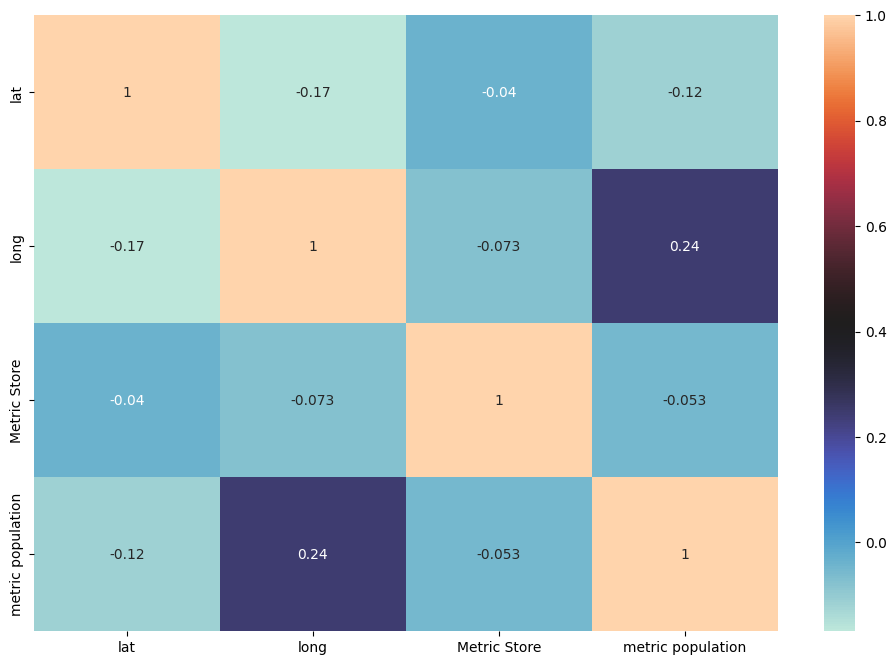

In [ ]:
#### Для візуалізації залежності між нашими елементами будуємо теплову карту.

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='icefire', annot=True)
plt.show()

### Бачимо, що кореляція між елементами нашого набору даних мінімальна, це означає, що нема прямої залежності між буль-якими двома елементами датасету.
### Нас в першу чергу цікавить залежність між площею відкритих магазинів та населенням відповідної локації, тому цей показник розглянемо окремо.

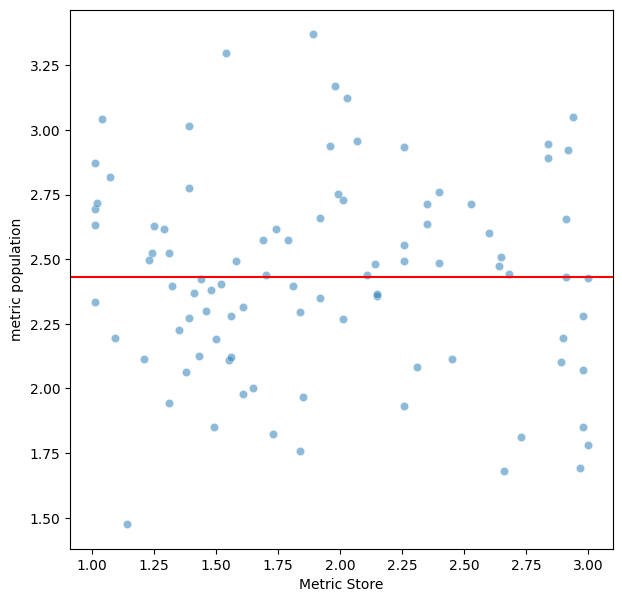

In [ ]:
### Досліджуємо взаємозвязок між площею відкритих магазинів та населенням відповідної локації

plt.figure(figsize = (7,7))
sns.scatterplot(data=df, x="Metric Store", y="metric population", alpha = 0.5)
plt.axhline(df['metric population'].mean(), color='red');

### Як ми переконались ще раз, немає лінійної залежності між площею магазинів та населенням відповідної локації, тому можемо зробити висновок, що нові магазини потрібно відкривати в локаціях, де ще немає магазинів. Найбільш привабливі локації потрібно вибирати в місцях з населенням вище середнього (вище 2,43). Але для більш детального дослідження недостатньо даних.

In [ ]:
df['metric population'].mean()

2.4307772363802247

### Визначимо ТОП 10 таких локацій

In [ ]:
# Завантажуємо список локацій

df1 = pd.read_excel('Test.xlsx', sheet_name='Population')
df1 = df1[df1['Is store'] == 0]
df1 = df1.sort_values('metric population', ascending=False)
df1 = df1[df1['metric population'] > 2.43]
df1.head(10)

,Location,lat,lon,metric population,Is store
12598,Location 12599,50.465030,30.602669,3.655685,0
12514,Location 12515,50.435559,30.616606,3.529561,0
3214,Location 3215,50.402219,30.630605,3.496600,0
11253,Location 11254,50.423042,30.538525,3.465973,0
10633,Location 10634,50.414012,30.540036,3.438066,0
11684,Location 11685,50.497137,30.440155,3.430517,0
7287,Location 7288,50.463091,30.592591,3.425845,0
154,Location 155,50.437580,30.527371,3.423450,0
12604,Location 12605,50.411439,30.473410,3.416138,0
11053,Location 11054,50.386936,30.467305,3.413179,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3103 entries, 12598 to 1801
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           3103 non-null   object 
 1   lat                3103 non-null   float64
 2   lon                3103 non-null   float64
 3   metric population  3103 non-null   float64
 4   Is store           3103 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 145.5+ KB


### Таким чином ми визначили ТОП 10 локацій які на мою думку найкращі для відкриття нових магазинів. Всього таких локація 3103.